<a href="https://colab.research.google.com/github/valering97/ExoticFruitClassification/blob/main/ExoticFruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Prediction model for a real estate market***

In [ ]:
%cd /content/

/content


In [ ]:
!rm -rf *

In [ ]:
!git clone https://github.com/valering97/ExoticFruitClassification.git

Cloning into 'ExoticFruitClassification'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 93 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (93/93), 35.22 KiB | 4.40 MiB/s, done.
Resolving deltas: 100% (45/45), done.


In [ ]:
%cd ExoticFruitClassification

/content/ExoticFruitClassification


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from src.data_processing import feature_scaling, df_split
from src.knn import plot_accuracy_vs_k, cross_validation_model

# ***Data Preprocessing and Feature Engineering***


*   Importing dataset to analyze
*  Check for missing values and duplicates
*  Feature Scaling with Normalization and Standardization
*  Splitting dataset into training and test using train_test_split()



In [ ]:
# Import Dataset
df = pd.read_csv("dataset/fruits.csv")
df.head()

,Frutto,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
0,Mela,86.40,89.68,8.69,9.61,2.41
1,Mela,77.58,73.45,6.49,7.20,3.87
2,Mela,81.95,81.66,6.40,9.09,2.88
3,Mela,66.33,36.71,6.78,8.21,2.55
4,Mela,56.73,75.69,5.78,9.15,3.88


In [ ]:
print(f'Dataset shape: {df.shape}')

Dataset shape: (500, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Frutto                 500 non-null    object 
 1   Peso (g)               500 non-null    float64
 2   Diametro medio (mm)    500 non-null    float64
 3   Lunghezza media (mm)   500 non-null    float64
 4   Durezza buccia (1-10)  500 non-null    float64
 5   Dolcezza (1-10)        500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


Fruit is the target column and then there are 5 numerical features with continous values (float64)

In [ ]:
df.describe()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,47.313440,86.573100,5.298620,7.437640,3.593220
std,26.768797,64.293403,2.641993,1.812548,1.264899
min,8.570000,7.530000,1.150000,3.070000,1.250000
25%,24.797500,50.510000,2.672500,6.152500,2.570000
50%,42.380000,70.450000,5.670000,7.340000,3.535000
75%,68.080000,88.852500,7.455000,8.615000,4.465000
max,111.210000,299.890000,11.140000,13.720000,6.950000


*Note*: Maximum value for Peel hardness could be an measurment error because it should have been 10, but it's 13.72

check for missing values:

In [ ]:
print(df.isnull().sum())

Frutto                   0
Peso (g)                 0
Diametro medio (mm)      0
Lunghezza media (mm)     0
Durezza buccia (1-10)    0
Dolcezza (1-10)          0
dtype: int64


check for duplicates:

In [ ]:
df.duplicated().sum()

0

NO missing values and duplicates found!

check target Fruit distributions:

In [ ]:
class_counts = df['Frutto'].value_counts()
print(class_counts)

Frutto
Mela       100
Banana     100
Arancia    100
Uva        100
Kiwi       100
Name: count, dtype: int64


There are 5 options: Apple, Banana, Orange, Grape, Kiwi, that results perfectly balanced

Two options:

*   MinMaxScaler method:
  *   it allows me to have all features in the same range of values [0,1] but it could cause a loss of significant information
  *  intuitive and fast to implement

*   StandardScaler method:
  *   it's useful to get stable and robust distributions from a statistically point of view, bringing all features to mean 0 and std 1


In [ ]:
# Feature scaling with MinMaxScaler method

df_minmax_transformed = feature_scaling(df, method = 'MinMax')
df_minmax_transformed.head()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10),Frutto
0,0.758281,0.280989,0.754755,0.614085,0.203509,Mela
1,0.672350,0.225475,0.534535,0.387793,0.459649,Mela
2,0.714926,0.253557,0.525526,0.565258,0.285965,Mela
3,0.562744,0.099808,0.563564,0.482629,0.228070,Mela
4,0.469213,0.233137,0.463463,0.570892,0.461404,Mela


In [ ]:
df_minmax_transformed.describe().map(lambda x: f"{x:.2f}")

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.00,500.00,500.00,500.00,500.00
mean,0.38,0.27,0.42,0.41,0.41
std,0.26,0.22,0.26,0.17,0.22
min,0.00,0.00,0.00,0.00,0.00
25%,0.16,0.15,0.15,0.29,0.23
50%,0.33,0.22,0.45,0.40,0.40
75%,0.58,0.28,0.63,0.52,0.56
max,1.00,1.00,1.00,1.00,1.00


In [ ]:
# Feature scaling with StandardScaler method

df_standard_transformed = feature_scaling(df, method = 'Standard')
df_standard_transformed.head()

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10),Frutto
0,1.461616,0.048372,1.284930,1.199712,-0.936364,Mela
1,1.131798,-0.204317,0.451391,-0.131240,0.219035,Mela
2,1.295211,-0.076493,0.417292,0.912536,-0.564420,Mela
3,0.711112,-0.776332,0.561267,0.426545,-0.825572,Mela
4,0.352126,-0.169442,0.182386,0.945671,0.226949,Mela


In [ ]:
df_standard_transformed.describe().map(lambda x: f'{x:.2f}')

,Peso (g),Diametro medio (mm),Lunghezza media (mm),Durezza buccia (1-10),Dolcezza (1-10)
count,500.00,500.00,500.00,500.00,500.00
mean,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.23,-1.57,-2.41,-1.85
25%,-0.84,-0.56,-0.99,-0.71,-0.81
50%,-0.18,-0.25,0.14,-0.05,-0.05
75%,0.78,0.04,0.82,0.65,0.69
max,2.39,3.32,2.21,3.47,2.66


I decided to use the standardized transformed data to split the dataset because, after testing the entire procedure with normalized data, the results obtained with standardized data were clearer.

In [ ]:
target = 'Frutto'

X_train, X_test, y_train, y_test = df_split(df_standard_transformed, target, test_size=0.2)

print(f"Dataset Shape before splitting: {df_standard_transformed.shape}")
print(f"X train Shape after splitting: {X_train.shape}")
print(f"X test Shape after splitting: {X_test.shape}")
print(f"y train Shape after splitting: {y_train.shape}")
print(f"y test Shape after splitting: {y_test.shape}")

Dataset Shape before splitting: (500, 6)
X train Shape after splitting: (400, 5)
X test Shape after splitting: (100, 5)
y train Shape after splitting: (400,)
y test Shape after splitting: (100,)


# ***K-Nearest Neighbors (KNN) implementation***

*   Choose K: Iterate over different values to determine the best hyperparameter.
*   Create the model: knn = KNeighborsClassifier(n_neighbors=K)
*   Train the model: knn.fit(X_train, y_train)
*  Evaluate the model's predictions and choose the model with highest accuracy_score on test set



------------------------------------------------------------
K=1
ACCURACY: TRAIN=1.0000 TEST=0.8600
LOG LOSS: TRAIN=0.0000 TEST=5.0461
------------------------------------------------------------
K=2
ACCURACY: TRAIN=0.9600 TEST=0.8500
LOG LOSS: TRAIN=0.0589 TEST=2.2527
------------------------------------------------------------
K=3
ACCURACY: TRAIN=0.9575 TEST=0.8900
LOG LOSS: TRAIN=0.0971 TEST=1.2300
------------------------------------------------------------
K=4
ACCURACY: TRAIN=0.9475 TEST=0.8500
LOG LOSS: TRAIN=0.1151 TEST=0.8888
------------------------------------------------------------
K=5
ACCURACY: TRAIN=0.9450 TEST=0.9200
LOG LOSS: TRAIN=0.1196 TEST=0.5362
------------------------------------------------------------
K=6
ACCURACY: TRAIN=0.9475 TEST=0.9000
LOG LOSS: TRAIN=0.1202 TEST=0.5334
------------------------------------------------------------
K=7
ACCURACY: TRAIN=0.9525 TEST=0.9200
LOG LOSS: TRAIN=0.1206 TEST=0.5371
-------------------------------------------------------

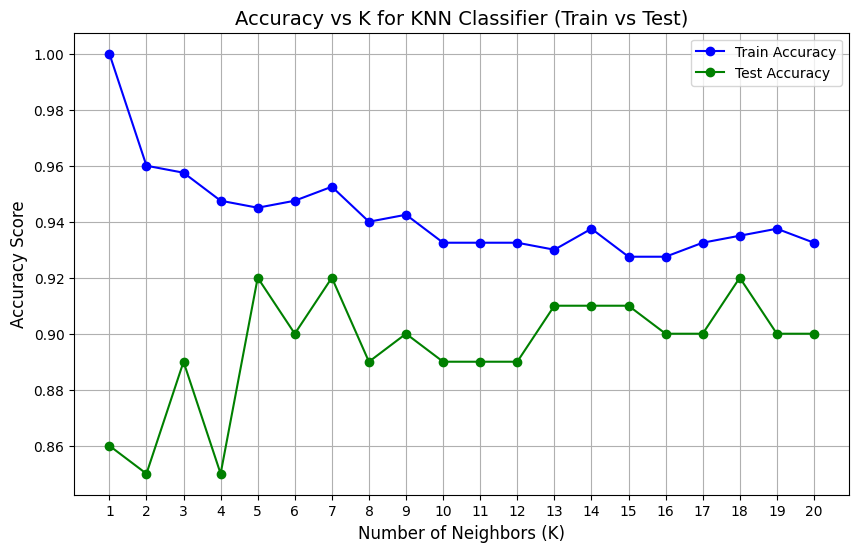

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier

Ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# Best Model variables
best_K = None
best_accuracy_test = -float('inf')
best_accuracy_train = -float('inf')
best_loss_test = None
best_loss_train = None

accuracies_train = []
accuracies_test = []

for K in Ks:
    print("-"*60)
    print("K=" + str(K))

    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_prob_train = knn.predict_proba(X_train)

    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)

    # Metrics to evalute knn classifier performance
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    loss_train = log_loss(y_train, y_prob_train)
    loss_test = log_loss(y_test, y_prob)

    print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train, accuracy_test))
    print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train, loss_test))

    accuracies_train.append(accuracy_train)
    accuracies_test.append(accuracy_test)

    # Choose the best model with highest accuracy
    if accuracy_test > best_accuracy_test:
        best_K = K
        best_accuracy_train = accuracy_train
        best_accuracy_test = accuracy_test
        best_loss_train = loss_train
        best_loss_test = loss_test

print("-"*60)
print("\nBest Model:")
print(f"K={best_K}")
print(f"ACCURACY: TRAIN={best_accuracy_train:.4f} TEST={best_accuracy_test:.4f}")
print(f"LOG LOSS: TRAIN={best_loss_train:.4f} TEST={best_loss_test:.4f}")

plot_accuracy_vs_k(Ks, accuracies_train, accuracies_test)

K=5 is better because it has the same accuracy_test value as K=7, but with a lower log_loss value.

In [ ]:
best_knn_model = KNeighborsClassifier(
    n_neighbors=5
)
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import (accuracy_score, classification_report)

y_pred = best_knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=best_knn_model.classes_))

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

     Arancia       0.78      0.90      0.84        20
      Banana       1.00      1.00      1.00        20
        Kiwi       0.89      0.85      0.87        20
        Mela       0.94      0.85      0.89        20
         Uva       1.00      1.00      1.00        20

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



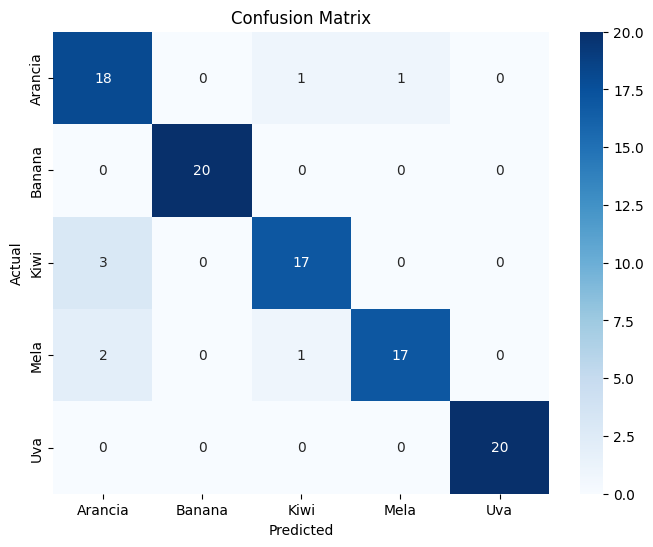

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=best_knn_model.classes_)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn_model.classes_, yticklabels=best_knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Analysis of the Results

#### 1. **Overall Accuracy**
The model's accuracy is **0.92 (92%)**, indicating that it correctly classifies 92% of the samples in the test set. This is a good result, but accuracy alone does not provide the full picture. We need to analyze other metrics (precision, recall, and F1-score) to better understand its performance on each class.

---

#### 2. **Performance by Class**
Analyzing the classification report for each class:

- **Orange**:
  - The relatively low precision suggests that the model confuses other classes with "Orange".

- **Banana**:
  - **Precision, Recall, F1-Score**: 1.00 → Perfect classification. All "Banana" samples are correctly classified.

- **Kiwi**:
  - The model has some difficulty distinguishing "Kiwi" from other classes.

- **Apple**:
  - **Precision**: 0.94 → Very high, indicating few misclassifications as "Apple".
  - **Recall**: 0.85 → Some "Apple" samples are not recognized correctly.
  - **F1-Score**: 0.89 → Solid performance, but recall could be improved.

- **Grapes**:
  - **Precision, Recall, F1-Score**: 1.00 → Perfect performance, all "Grapes" samples are correctly recognized.

---


In summary, the model performs very well overall but has room for improvement in the "Orange" and "Kiwi" classes. A combination of hyperparameter tuning, feature engineering, and error analysis could further enhance the results.

# ***Cross-validation step:***
it is an important step to evaluate the generalization ability of the model.


In [ ]:
results_cv = cross_validation_model(df_standard_transformed, target='Frutto', n_neighbors=5, cv=10)


Training KNN in Fold 1...
Training KNN in Fold 2...
Training KNN in Fold 3...
Training KNN in Fold 4...
Training KNN in Fold 5...
Training KNN in Fold 6...
Training KNN in Fold 7...
Training KNN in Fold 8...
Training KNN in Fold 9...
Training KNN in Fold 10...


In [ ]:
results_cv

,fold,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_loss,test_loss
0,1,0.942222,0.88,0.942631,0.908571,0.942222,0.88,0.942222,0.880000,0.117654,0.204033
1,2,0.935556,0.96,0.935659,0.961818,0.935556,0.96,0.935533,0.959950,0.130196,0.112879
2,3,0.942222,0.98,0.942319,0.981818,0.942222,0.98,0.941999,0.979950,0.126305,0.079399
3,4,0.935556,1.00,0.935748,1.000000,0.935556,1.00,0.935185,1.000000,0.135376,0.048501
4,5,0.948889,0.88,0.949178,0.885455,0.948889,0.88,0.948901,0.881855,0.110853,0.209787
5,6,0.942222,0.90,0.942482,0.918462,0.942222,0.90,0.942018,0.901228,0.123058,0.173135
6,7,0.948889,0.86,0.949578,0.868765,0.948889,0.86,0.949087,0.852950,0.106625,2.303224
7,8,0.955556,0.84,0.955370,0.862857,0.955556,0.84,0.955429,0.839425,0.111895,0.942890
8,9,0.942222,0.92,0.942733,0.923636,0.942222,0.92,0.942332,0.920902,0.118908,0.851603
9,10,0.942222,0.92,0.942437,0.920000,0.942222,0.92,0.942252,0.920000,0.126881,0.165026
